In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
data = pd.read_csv('prices.csv')


In [3]:
usa_data = data[(data['Country']=="usa")].copy()
usa_data["Date"] = pd.to_datetime(usa_data["Date"], utc=True)

In [4]:
usa_data["Log_Returns"] = usa_data.groupby("Ticker")["Close"].transform(lambda x: np.log(x / x.shift(-1)))
usa_data["Volume_Change"] = usa_data.groupby("Ticker")["Volume"].pct_change(-1)
usa_data["Lagged_Volume"] = usa_data.groupby("Ticker")["Volume"].shift(-1)
usa_data['Lagged_Volume_Change'] = usa_data.groupby("Ticker")["Volume_Change"].shift(-1)

In [5]:
usa_data.sort_values(by=['Ticker','Date'])

,Date,Open,High,Low,Close,Volume,Brand_Name,Ticker,Industry_Tag,Country,Dividends,Stock Splits,Capital Gains,Log_Returns,Volume_Change,Lagged_Volume,Lagged_Volume_Change
310097,2000-01-03 05:00:00+00:00,0.794800,0.852586,0.770643,0.848323,535796800.0,apple,AAPL,technology,usa,0.0,0.0,NaN,NaN,NaN,NaN,NaN
310056,2000-01-04 05:00:00+00:00,0.820377,0.838376,0.766854,0.776801,512377600.0,apple,AAPL,technology,usa,0.0,0.0,NaN,-0.088077,-0.043709,535796800.0,NaN
310022,2000-01-05 05:00:00+00:00,0.786273,0.837902,0.780590,0.788168,778321600.0,apple,AAPL,technology,usa,0.0,0.0,NaN,0.014527,0.519039,512377600.0,-0.043709
309992,2000-01-06 05:00:00+00:00,0.804273,0.810904,0.719961,0.719961,767972800.0,apple,AAPL,technology,usa,0.0,0.0,NaN,-0.090514,-0.013296,778321600.0,0.519039
309979,2000-01-07 05:00:00+00:00,0.731329,0.765433,0.723751,0.754065,460734400.0,apple,AAPL,technology,usa,0.0,0.0,NaN,0.046281,-0.400064,767972800.0,-0.013296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,2025-06-30 04:00:00+00:00,78.449997,78.485001,77.250000,77.980003,3626300.0,zoom video communications,ZM,technology,usa,0.0,0.0,NaN,-0.005116,0.073184,3379012.0,-0.009494
206,2025-07-01 04:00:00+00:00,77.790001,78.175003,76.870003,77.570000,3051600.0,zoom video communications,ZM,technology,usa,0.0,0.0,NaN,-0.005272,-0.158481,3626300.0,0.073184
116,2025-07-02 04:00:00+00:00,77.099998,77.699997,76.669998,77.589996,2597000.0,zoom video communications,ZM,technology,usa,0.0,0.0,NaN,0.000258,-0.148971,3051600.0,-0.158481
9,2025-07-03 04:00:00+00:00,77.599998,79.824997,77.410004,78.580002,2882442.0,zoom video communications,ZM,technology,usa,0.0,0.0,NaN,0.000000,-0.002408,2889400.0,0.112591


In [6]:
nvda = usa_data[(usa_data['Ticker']=='NVDA') & (usa_data['Date'].between("2000-01-01","2005-12-31"))]
nvda.set_index("Date", inplace=True)


In [7]:
nvda

,Open,High,Low,Close,Volume,Brand_Name,Ticker,Industry_Tag,Country,Dividends,Stock Splits,Capital Gains,Log_Returns,Volume_Change,Lagged_Volume,Lagged_Volume_Change
Date,,,,,,,,,,,,,,,,
2005-12-30 05:00:00+00:00,2.833316,2.834082,2.783623,2.795091,22960800.0,nvidia,NVDA,technology,usa,0.0,0.0,NaN,-0.019234,-0.260436,31046400.0,0.174132
2005-12-29 05:00:00+00:00,2.912826,2.922001,2.837139,2.849371,31046400.0,nvidia,NVDA,technology,usa,0.0,0.0,NaN,-0.022550,0.174132,26442000.0,-0.281405
2005-12-28 05:00:00+00:00,2.887597,2.923530,2.869249,2.914356,26442000.0,nvidia,NVDA,technology,usa,0.0,0.0,NaN,0.009224,-0.281405,36796800.0,0.715181
2005-12-27 05:00:00+00:00,2.866956,2.918944,2.857782,2.887598,36796800.0,nvidia,NVDA,technology,usa,0.0,0.0,NaN,0.006108,0.715181,21453600.0,-0.326071
2005-12-23 05:00:00+00:00,2.855488,2.873836,2.836375,2.870013,21453600.0,nvidia,NVDA,technology,usa,0.0,0.0,NaN,0.007755,-0.326071,31833600.0,0.100062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000-01-07 05:00:00+00:00,0.783635,0.808720,0.771689,0.800359,7118400.0,nvidia,NVDA,technology,usa,0.0,0.0,NaN,0.016554,-0.409163,12048000.0,-0.360347
2000-01-06 05:00:00+00:00,0.842168,0.842168,0.754965,0.787218,12048000.0,nvidia,NVDA,technology,usa,0.0,0.0,NaN,-0.067475,-0.360347,18835200.0,-0.373163
2000-01-05 05:00:00+00:00,0.845752,0.860087,0.830223,0.842169,18835200.0,nvidia,NVDA,technology,usa,0.0,0.0,NaN,-0.033476,-0.373163,30048000.0,-0.001436


In [8]:
features = nvda[["Log_Returns", "Volume", "Volume_Change", "Lagged_Volume", "Lagged_Volume_Change"]].copy()

In [9]:
features.dropna()

,Log_Returns,Volume,Volume_Change,Lagged_Volume,Lagged_Volume_Change
Date,,,,,
2005-12-30 05:00:00+00:00,-0.019234,22960800.0,-0.260436,31046400.0,0.174132
2005-12-29 05:00:00+00:00,-0.022550,31046400.0,0.174132,26442000.0,-0.281405
2005-12-28 05:00:00+00:00,0.009224,26442000.0,-0.281405,36796800.0,0.715181
2005-12-27 05:00:00+00:00,0.006108,36796800.0,0.715181,21453600.0,-0.326071
2005-12-23 05:00:00+00:00,0.007755,21453600.0,-0.326071,31833600.0,0.100062
...,...,...,...,...,...
2000-01-11 05:00:00+00:00,-0.041305,14812800.0,-0.382429,23985600.0,2.369521
2000-01-10 05:00:00+00:00,0.032308,23985600.0,2.369521,7118400.0,-0.409163
2000-01-07 05:00:00+00:00,0.016554,7118400.0,-0.409163,12048000.0,-0.360347


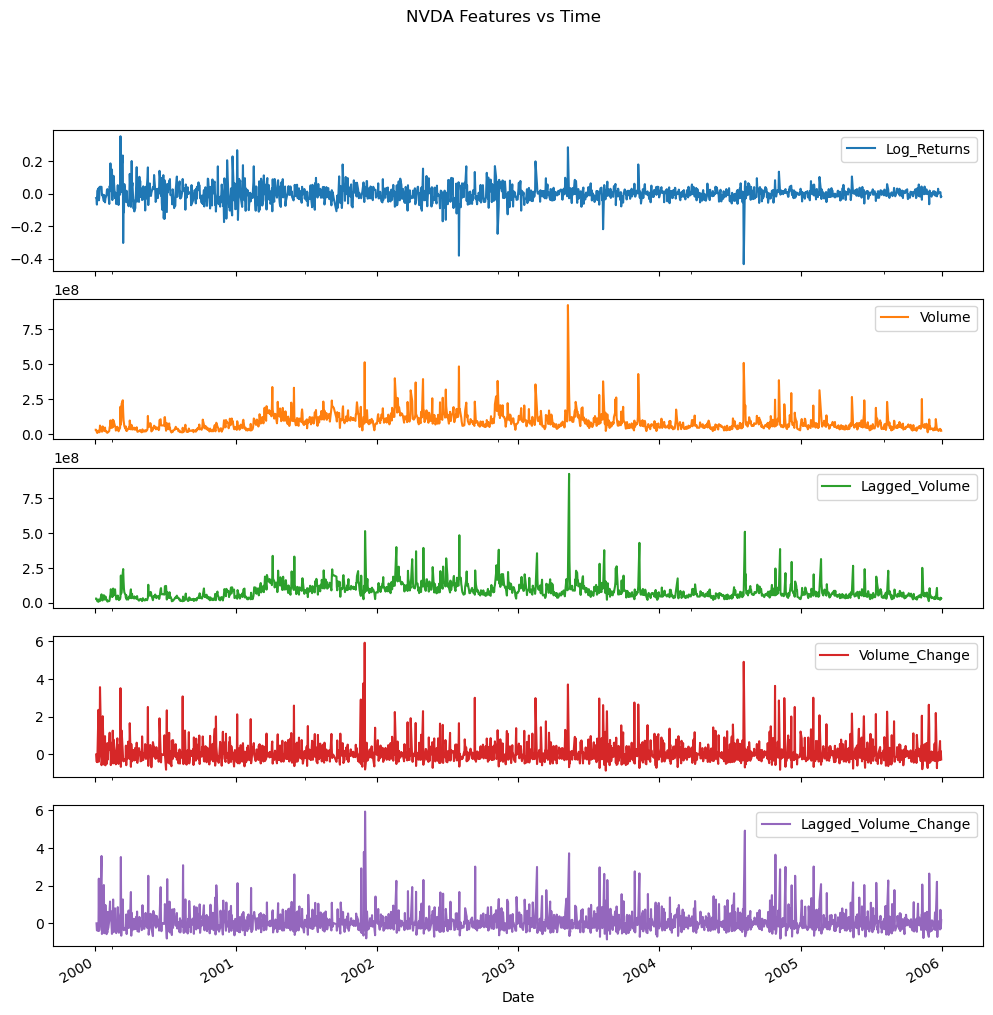

In [10]:
features[["Log_Returns", "Volume", "Lagged_Volume", "Volume_Change","Lagged_Volume_Change"]].plot(
    subplots=True, figsize=(12,12), title="NVDA Features vs Time", sharex=True
)

plt.show()


Scatter Plot of features vs Log Returns

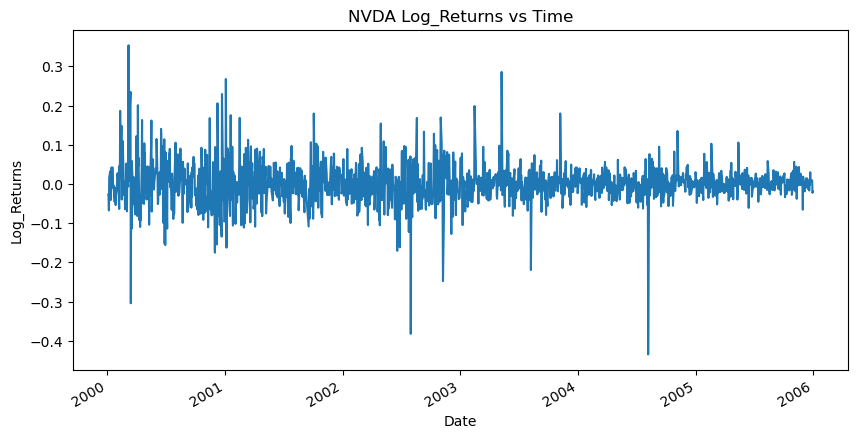

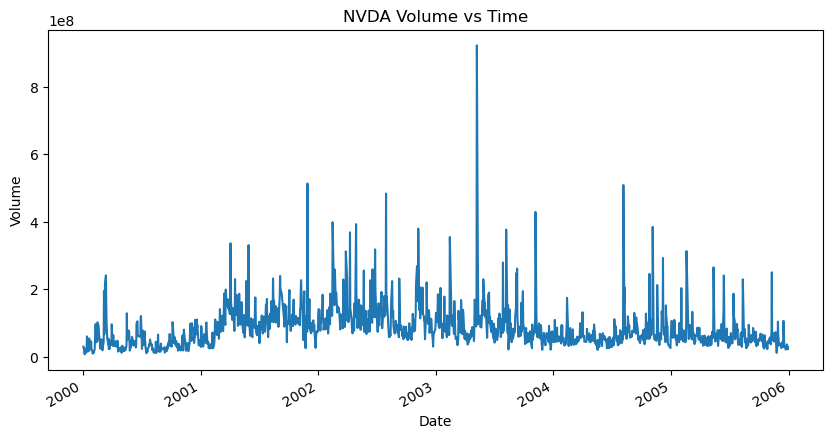

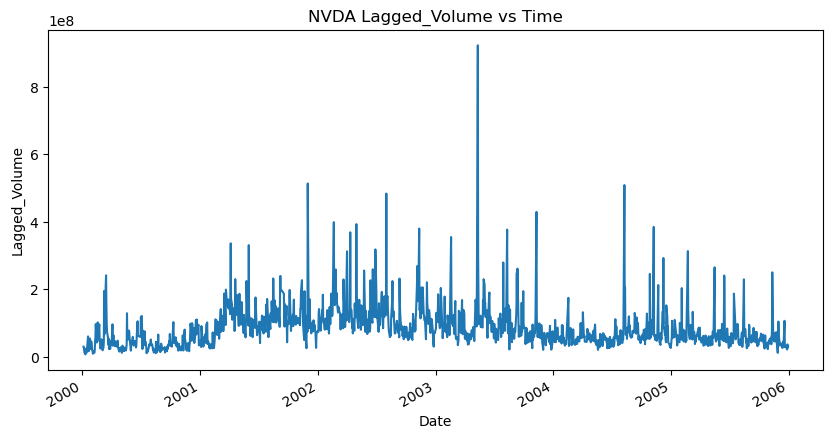

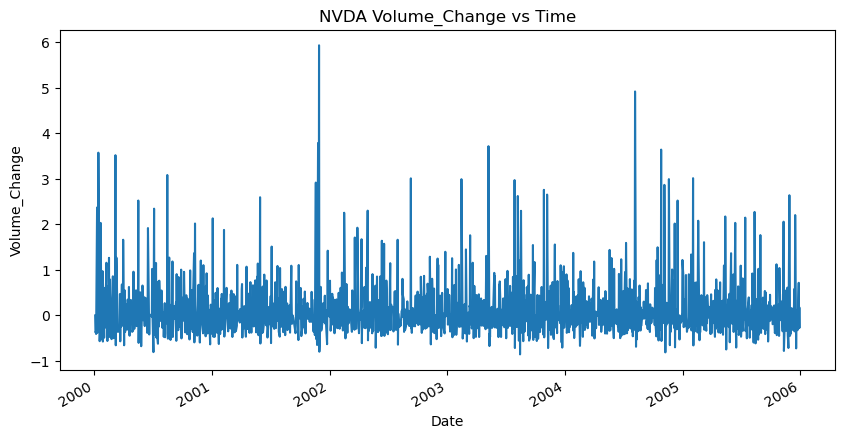

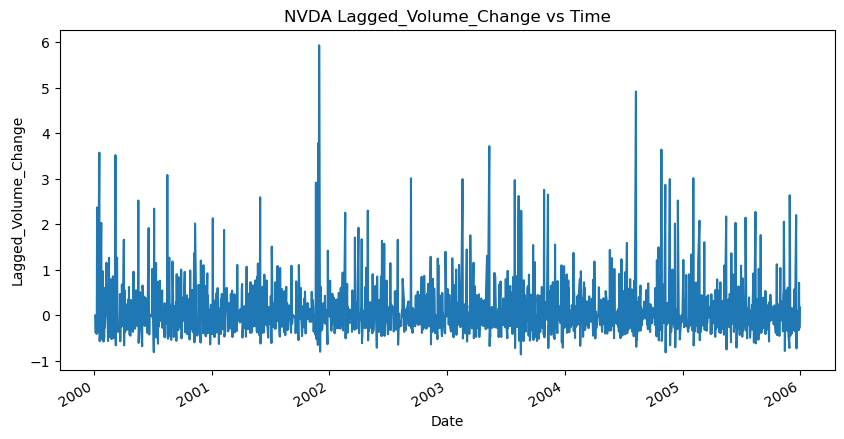

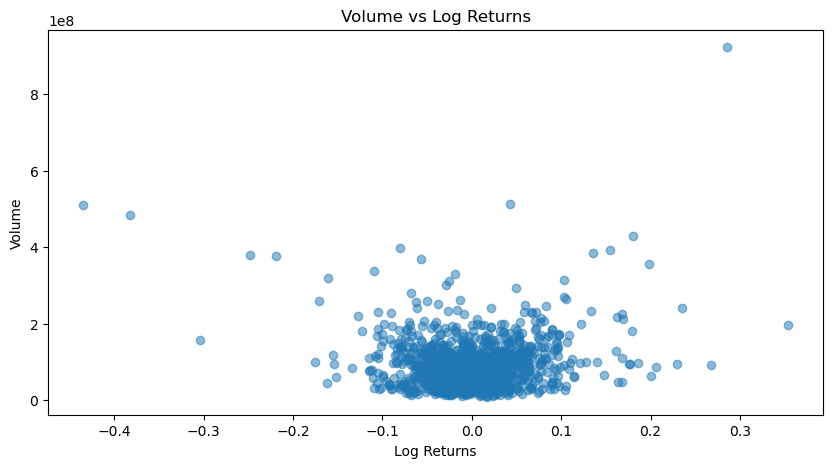

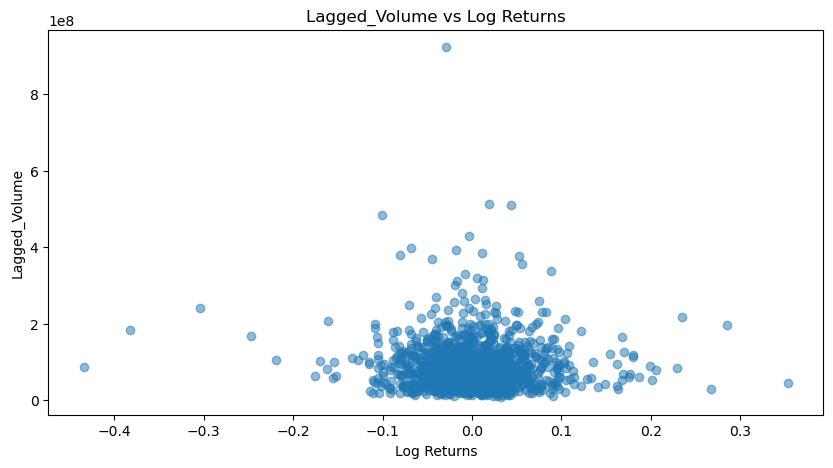

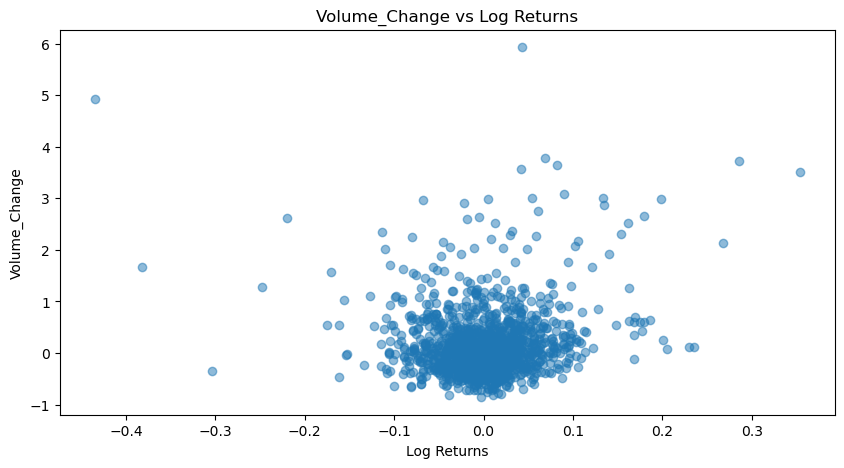

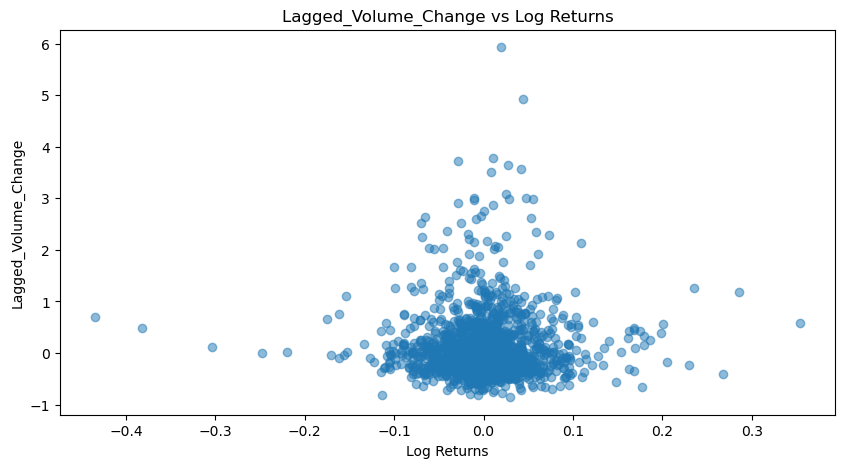

In [11]:
cols = ["Volume", "Lagged_Volume", "Volume_Change", "Lagged_Volume_Change"]

for col in ["Log_Returns"] + cols:
    features[col].plot(figsize=(10,5), title=f"NVDA {col} vs Time")
    plt.xlabel("Date")
    plt.ylabel(col)
    plt.show()
for col in cols:
    plt.figure(figsize=(10,5))
    plt.scatter(features["Log_Returns"],features[col],alpha=0.5)
    plt.xlabel("Log Returns")
    plt.ylabel(col)
    plt.title(f"{col} vs Log Returns")
    plt.show()

Repo link
https://github.com/paulomercado/pracsem